In [2]:
import numpy as np

In [4]:
A = np.array([[1, 2, 3, 4], 
              [5, 6, 7, 8], 
              [9, 10, 11, 12], 
              [13, 14, 15, 16]])
U, S, Vt = np.linalg.svd(A)
print("Matrix A:\n", A)
print("\nU Matrix:\n", U)
print("\nSingular Values:\n", S)
print("\nV^T Matrix:\n", Vt)

Matrix A:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

U Matrix:
 [[-0.13472212 -0.82574206  0.54432436  0.06091792]
 [-0.3407577  -0.4288172  -0.77117135  0.32449153]
 [-0.54679327 -0.03189234 -0.09063038 -0.83173682]
 [-0.75282884  0.36503251  0.31747737  0.44632737]]

Singular Values:
 [3.86226568e+01 2.07132307e+00 1.52856047e-15 2.72860272e-16]

V^T Matrix:
 [[-0.4284124  -0.47437252 -0.52033264 -0.56629275]
 [ 0.71865348  0.27380781 -0.17103786 -0.61588352]
 [-0.15245872 -0.18883588  0.83504791 -0.49375331]
 [ 0.52607636 -0.81507117  0.05191325  0.23708156]]


In [6]:
def reconstract_matrix(U,S,Vt):
    return np.dot(U, np.dot(np.diag(S), Vt))
recon_A = reconstract_matrix(U,S,Vt)
print(recon_A)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]


In [8]:
reconstract_error = np.linalg.norm(A - recon_A,2)
print(reconstract_error)

1.0821996385275096e-14


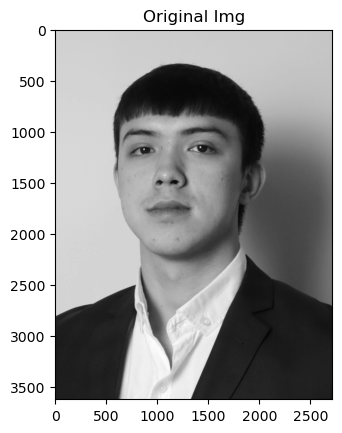

Image original size: 9843691 pixels


(3623, 2717)

In [50]:
import matplotlib.pyplot as plt
from skimage import io

image = io.imread('my_face.JPG', as_gray=True)

plt.imshow(image, cmap='gray')
plt.title('Original Img')
plt.show()
print(f'Image original size: {np.prod(image.shape)} pixels')
image.shape

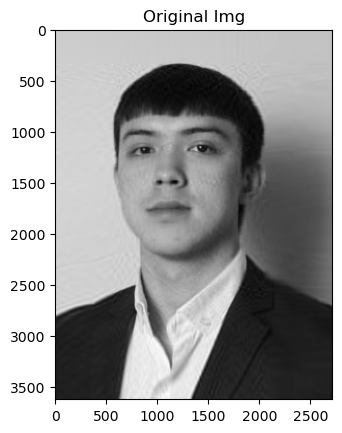

Image original size: 317050 pixels


In [32]:
U, S, Vt = np.linalg.svd(image)

def reconstract_image(U, S, Vt, k):
    return np.dot(U[:,:k], np.dot(np.diag(S[:k]), Vt[:k]))
recon_img = reconstract_image(U, S, Vt, 50)

plt.imshow(recon_img, cmap='gray')
plt.title('Original Img')
plt.show()
print(f'Image original size: {U[:,:50].size + S[:50].size + Vt[:50].size} pixels')

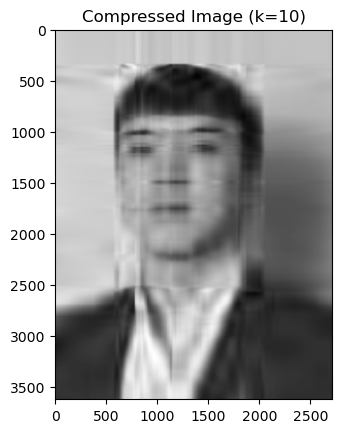

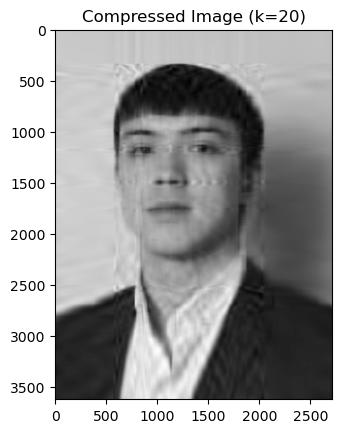

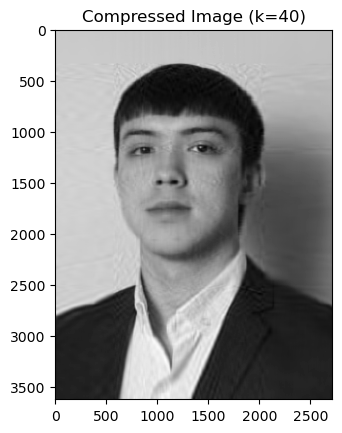

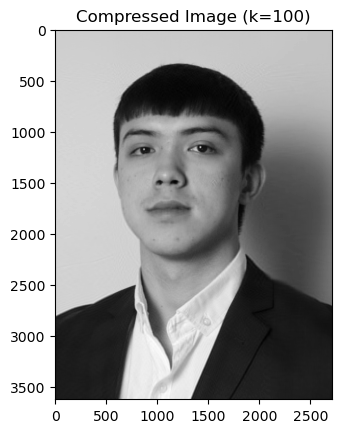

Original size: 20510935, After compressing k10: 63410
Original size: 20510935, After compressing k20: 126820
Original size: 20510935, After compressing k40: 253640
Original size: 20510935, After compressing k100: 634100


In [34]:
ks = [10,20,40,100]

for k in ks:
    recon_img = reconstract_image(U, S, Vt, k)
    plt.imshow(recon_img, cmap='gray')
    plt.title(f'Compressed Image (k={k})')
    plt.show()

original_size = U.size + S.size + Vt.size
compressed_size_k = lambda k: U[:, :k].size + S[:k].size + Vt[:k, :].size
for k in ks:
    print(f'Original size: {original_size}, After compressing k{k}: {compressed_size_k(k)}' )

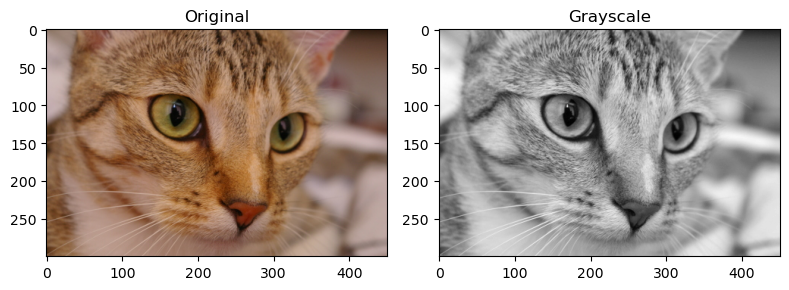

(300, 451, 3)

In [48]:
# Import useful modules
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage import data
images = (
'astronaut',
'binary_blobs',
'brick',
'colorwheel',
'camera',
'cat',
'checkerboard',
'clock',
'coffee',
'coins',
'eagle',
'grass',
'gravel',
'horse',
'logo',
'page',
'text',
'rocket',
)
# We select the "coffee" image
caller = getattr(data, 'cat')
original = caller()
# Then we convert it in grayscale
grayscale = rgb2gray(original)
# Plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
fig.tight_layout()
plt.show()
A = np.matrix(grayscale)
original.shape

In [42]:
U, S, Vt = np.linalg.svd(A)

print(f"U: {U}\n")
print(f"S: {S}\n")
print(f"Vt: {Vt}")

U: [[-0.05169698 -0.07354608  0.0441153  ... -0.07988875 -0.0584584
  -0.03824287]
 [-0.0516497  -0.07471783  0.04653544 ...  0.10084738  0.14909323
   0.05003661]
 [-0.05163224 -0.07531087  0.05024318 ... -0.02554351 -0.18181389
  -0.02204087]
 ...
 [-0.06677288  0.0311474   0.03493233 ...  0.00115441 -0.00689057
   0.04745911]
 [-0.0668638   0.02720109  0.03599754 ...  0.02132047  0.00986954
  -0.00101149]
 [-0.06691356  0.02633296  0.03607362 ...  0.00043176  0.04172398
  -0.00479383]]

S: [1.70427845e+02 2.16412563e+01 1.73935477e+01 1.23998952e+01
 1.15408893e+01 1.02202865e+01 9.12435500e+00 7.39180150e+00
 6.85295078e+00 6.63101075e+00 5.55081262e+00 5.20241359e+00
 4.99675067e+00 4.88703590e+00 4.43656091e+00 4.22983163e+00
 3.91075220e+00 3.73049935e+00 3.50533765e+00 3.33486586e+00
 3.14374591e+00 3.01445235e+00 2.92188951e+00 2.73973091e+00
 2.48531608e+00 2.42543488e+00 2.35756737e+00 2.25091130e+00
 2.20144727e+00 2.15661660e+00 2.07293451e+00 1.97211394e+00
 1.93961885e+0

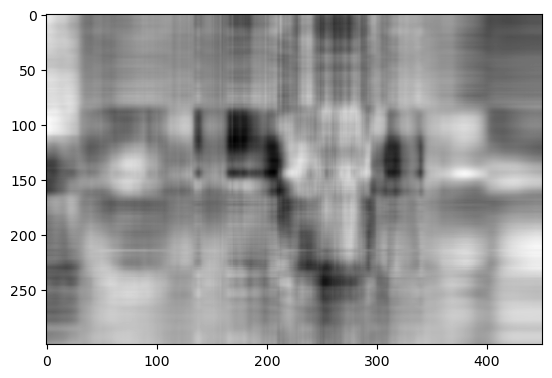

In [44]:
def recon(U,S,Vt,k):
    return np.dot(U[:,:k], np.dot(np.diag(S[:k]), Vt[:k]))

recon_image = recon(U, S, Vt, 5)
plt.imshow(recon_image, cmap='gray')
plt.show()


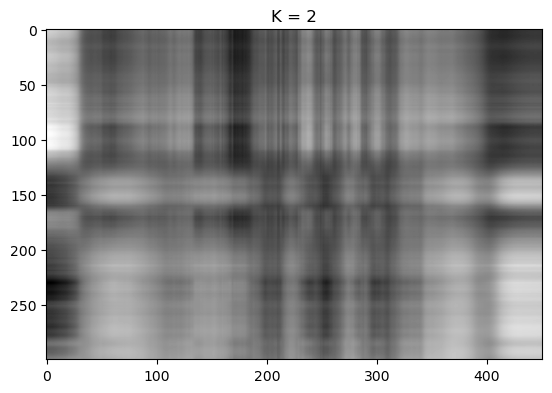

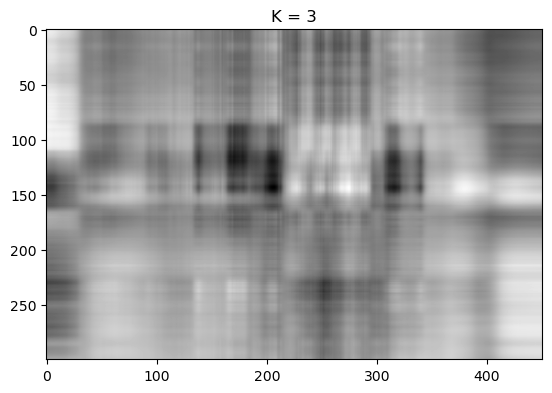

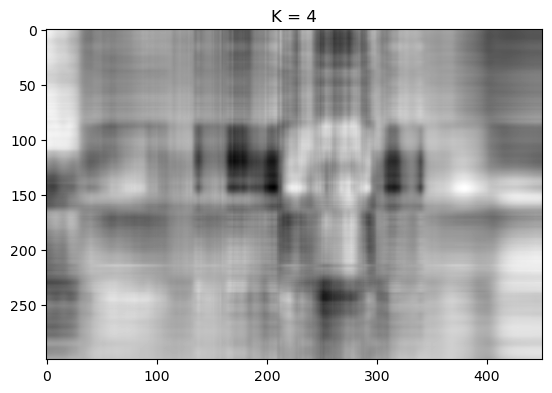

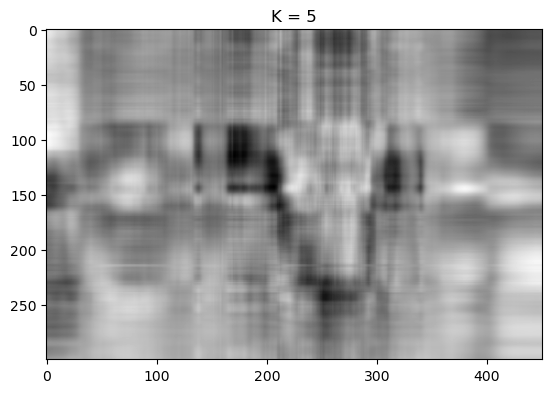

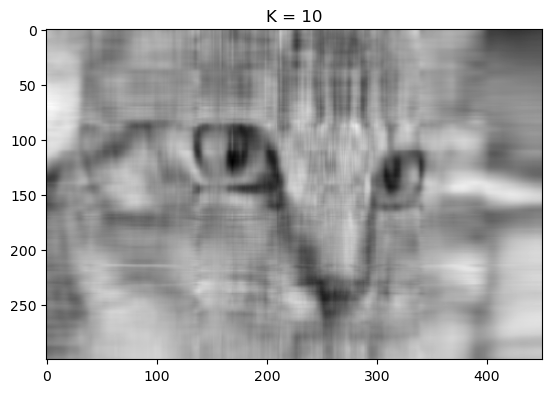

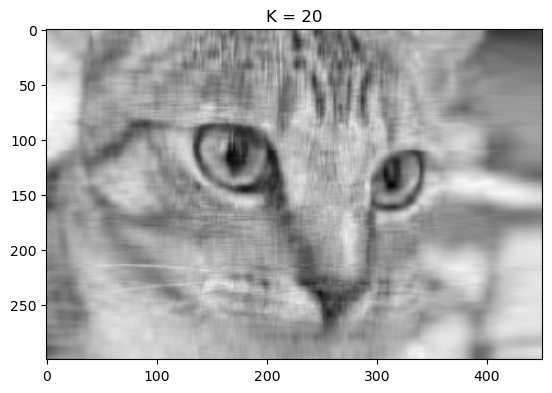

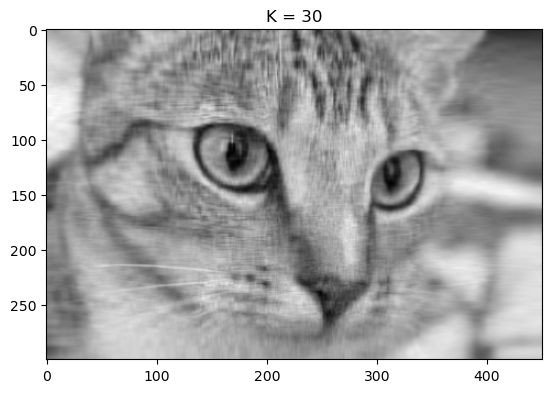

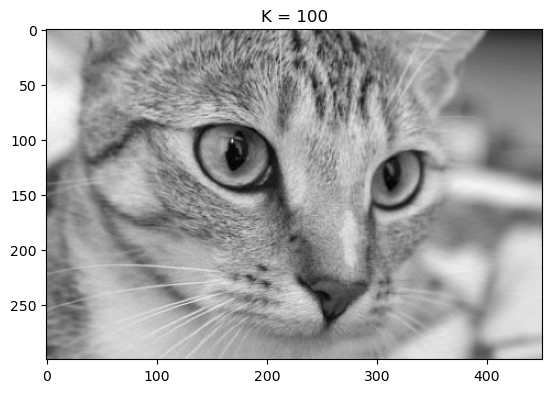

Original size: 405900, After compression k=2: 1504
Original size: 405900, After compression k=3: 2256
Original size: 405900, After compression k=4: 3008
Original size: 405900, After compression k=5: 3760
Original size: 405900, After compression k=10: 7520
Original size: 405900, After compression k=20: 15040
Original size: 405900, After compression k=30: 22560
Original size: 405900, After compression k=100: 75200


405900

In [46]:
kb = [2,3,4,5,10,20,30,100]

for k in kb:
    recon_image = recon(U, S, Vt,k)
    plt.imshow(recon_image, cmap='gray')
    plt.title(f'K = {k}')
    plt.show()

original_size = np.prod(original.shape)
after_compression = lambda k: U[:,:k].size + S[:k].size + Vt[:k].size 
for k in kb:
    print(f'Original size: {original_size}, After compression k={k}: {after_compression(k)}')
original_size

In [92]:
error_after_recon = np.linalg.norm(recon(U, S, Vt,15), 2)
print(error_after_recon)

170.42784459897572


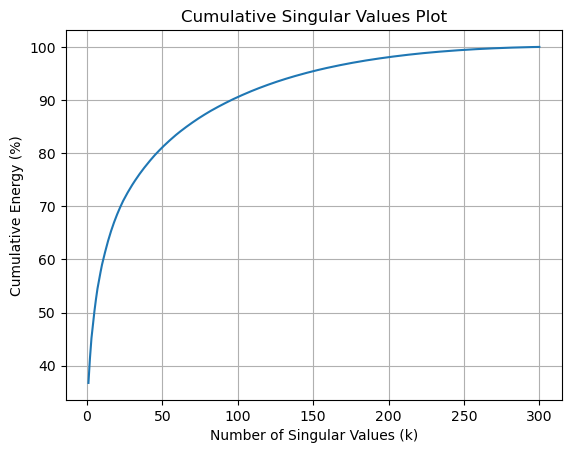

In [69]:
cummulative_sing_val = np.cumsum(S)
total_energy = cummulative_sing_val[-1]

plt.plot(np.arange(1, len(S) + 1), cummulative_sing_val / total_energy * 100)
plt.xlabel('Number of Singular Values (k)')
plt.ylabel('Cumulative Energy (%)')
plt.title('Cumulative Singular Values Plot')
plt.grid(True)
plt.show()

In [6]:
A = np.array([[39,21,24,18],
             [47,25,29,21],
             [59,29,37,21],
             [54,22,35,9],])
A

array([[39, 21, 24, 18],
       [47, 25, 29, 21],
       [59, 29, 37, 21],
       [54, 22, 35,  9]])

In [34]:
rank_A = np.linalg.matrix_rank(A)
U, S, Vt = np.linalg.svd(A)
threshold = 1e-10
rank = np.sum(S > threshold)
range_basis = U[:,:min(A.shape)]
null_space_basis = Vt.T[:,min(A.shape):]

print("Ранг матрицы A (Rank):")
print(rank)

print("Ортонормированный базис для образа (Range):")
print(range_basis)

print("\nОртонормированный базис для ядра (Null space):")
print(null_space_basis)

Ранг матрицы A (Rank):
2
Ортонормированный базис для образа (Range):
[[-0.40078164 -0.4032338   0.81301472 -0.125633  ]
 [-0.48107614 -0.42663132 -0.34292745  0.68480087]
 [-0.58905663 -0.07616648 -0.43293652 -0.67806852]
 [-0.51083472  0.80596953  0.18431983  0.23555721]]

Ортонормированный базис для ядра (Null space):
[]
